In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pydataset import data
import scipy.stats as stats
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

import acquire
import wrangle_mall
import wrangle_zillow

# Modeling Exercises

Clustering with the Iris Dataset:

Using this lesson as a guide, perform clustering on the iris dataset.

- Choose features other than the ones used in the lesson.
- Visualize the results of your clustering.
- Use the elbow method to visually select a good value for k.
- Repeat the clustering, this time with 3 different features.

In [95]:
df = data('iris')

In [96]:
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [97]:
train, validate, test = wrangle_mall.subset_df(df)

(90, 5) (30, 5) (30, 5)


## clustering on two columns

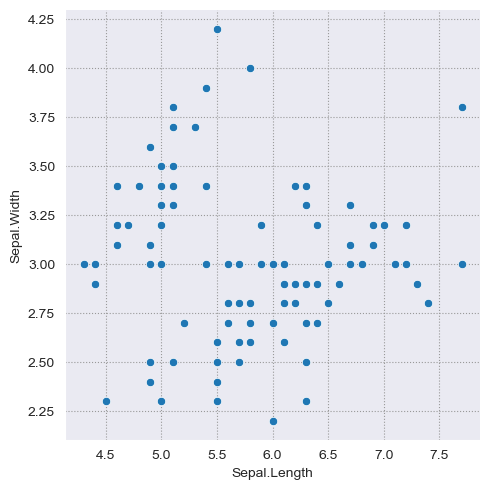

In [98]:
sns.relplot(data=train, x='Sepal.Length', y='Sepal.Width')

plt.show()

In [99]:
cols = ['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']

train_scaled, validate_scaled, test.scaled = wrangle_mall.scale_data(train, validate, test, MinMaxScaler(), cols)

/var/folders/zk/vf208zwx67vf8nf5b5xtyllw0000gn/T/ipykernel_26759/4016667377.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  train_scaled, validate_scaled, test.scaled = wrangle_mall.scale_data(train, validate, test, MinMaxScaler(), cols)


In [ ]:
X_train_scaled = X_train_scaled[['Sepal.Length', 'Sepal.Width']]

In [109]:
inertia = []
seed = 42

for n in range(1, 11):
    
    kmeans = KMeans(n_clusters=n, random_state=seed)
    
    kmeans.fit(X_train_scaled[['Sepal.Length', 'Sepal.Width']])
    
    inertia.append(kmeans.inertia_)
    
inertia

[8.913872068435218,
 5.1201502573347675,
 2.950574664135718,
 2.295643358846096,
 1.7171951559490197,
 1.448166943481168,
 1.26772993854233,
 1.0861805555555553,
 0.9217752136848154,
 0.7938491754544955]

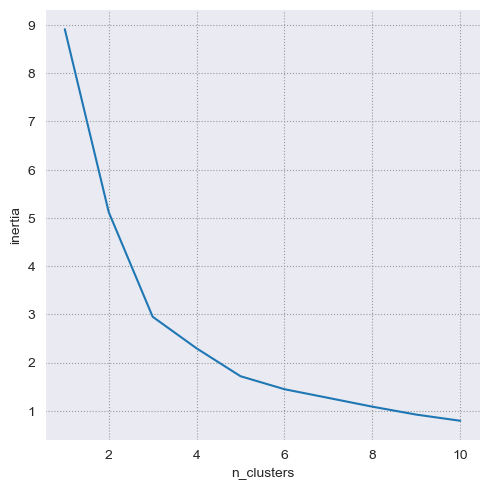

In [110]:
results_df = pd.DataFrame({'n_clusters': list(range(1,11)),
              'inertia': inertia})

sns.relplot(data=results_df, x='n_clusters', y='inertia', kind='line')

plt.show()

In [ ]:
seed = 42

kmeans = KMeans(n_clusters=3, random_state=seed)

kmeans.fit(X_train_scaled)

kmeans.predict(X_train_scaled)

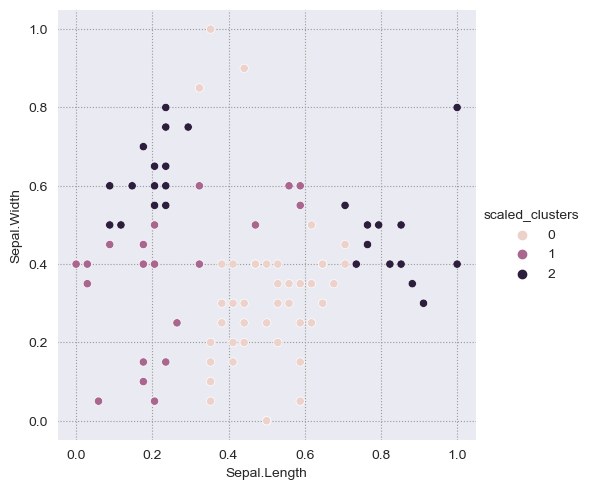

In [108]:
sns.relplot(data=X_train_scaled, x='Sepal.Length', y='Sepal.Width', hue='scaled_clusters')

plt.show()

In [ ]:
X_train_scaled['scaled_clusters'] = kmeans.predict(X_train_scaled)

In [111]:
X_train_scaled.head()

,Sepal.Length,Sepal.Width,scaled_clusters
124,0.588235,0.25,0
25,0.147059,0.60,2
26,0.205882,0.40,1
24,0.235294,0.55,2
95,0.382353,0.25,0


- Using the elbow method, the best number of clusters when clustering on sepal length and width is 3

## clustering on three columns

In [28]:
inertia = []
seed = 42

for n in range(1, 11):
    
    kmeans = KMeans(n_clusters=n, random_state=seed)
    
    kmeans.fit(q_train_scaled[['Petal.Length', 'Petal.Width', 'Sepal.Length']])
    
    inertia.append(kmeans.inertia_)
    
inertia

[22.127721983401205,
 5.560849817868323,
 2.898105569663898,
 2.064616515990191,
 1.6488632692128766,
 1.3730889904466481,
 1.1888134646050474,
 1.0276050196662374,
 0.9169165883556972,
 0.8431733290269535]

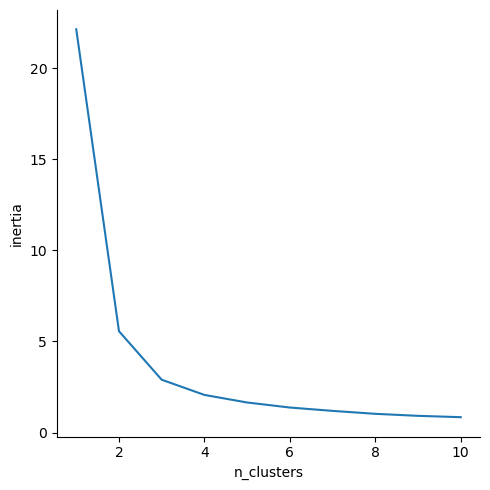

In [29]:
results_df = pd.DataFrame({'n_clusters': list(range(1,11)),
              'inertia': inertia})

sns.relplot(data=results_df, x='n_clusters', y='inertia', kind='line')

plt.show()

- Using the elbow method, the best number of clusters when clustering on petal length, width, and sepal length is 3 as well

Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!



In [30]:
df = wrangle_mall.get_mall_customers()

In [31]:
df

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [38]:
train, validate, test = wrangle_mall.subset_df(df)

(120, 5) (40, 5) (40, 5)


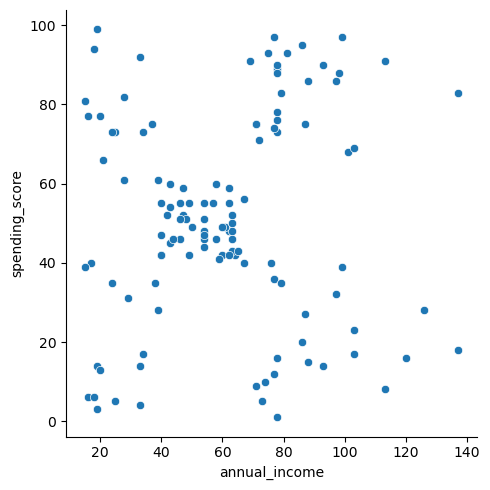

In [33]:
sns.relplot(data=train, x='annual_income', y='spending_score')

plt.show()

In [34]:
cols = ['age', 'annual_income', 'spending_score']

train_scaled, validate_scaled, test_scaled = wrangle_mall.scale_data(train, validate, test, MinMaxScaler(), cols) 

In [35]:
train_scaled

,customer_id,gender,age,annual_income,spending_score
2,3,Female,0.038462,0.008197,0.051020
77,78,Male,0.423077,0.319672,0.479592
46,47,Female,0.615385,0.204918,0.551020
187,188,Male,0.192308,0.704918,0.683673
191,192,Female,0.269231,0.721311,0.693878
85,86,Male,0.576923,0.319672,0.459184
161,162,Female,0.211538,0.524590,0.836735
36,37,Female,0.461538,0.155738,0.163265
190,191,Female,0.307692,0.721311,0.224490
61,62,Male,0.019231,0.254098,0.551020


In [36]:
inertia = []
seed = 42

for n in range(1, 11):
    
    kmeans = KMeans(n_clusters=n, random_state=seed)
    
    kmeans.fit(train_scaled[['annual_income', 'spending_score']])
    
    inertia.append(kmeans.inertia_)
    
inertia

[14.994102954187285,
 9.120710101476346,
 5.776161989560766,
 3.7707111316397643,
 2.2761183962405767,
 1.926638394947661,
 1.6564598765277176,
 1.3901298439059382,
 1.1575611685781548,
 1.0347719662849422]

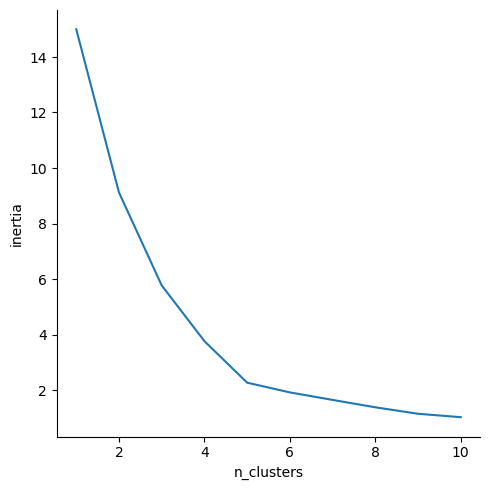

In [37]:
results_df = pd.DataFrame({'n_clusters': list(range(1,11)),
              'inertia': inertia})

sns.relplot(data=results_df, x='n_clusters', y='inertia', kind='line')

plt.show()

- Using the elbow method here, 5 clusters seems to work the best when clustering annual income and spending score together.

How does scaling impact the results of clustering?

- Doing the same as above, but without the scaling

In [39]:
inertia = []
seed = 42

for n in range(1, 11):
    
    kmeans = KMeans(n_clusters=n, random_state=seed)
    
    kmeans.fit(train[['annual_income', 'spending_score']])
    
    inertia.append(kmeans.inertia_)
    
inertia

[177411.31666666668,
 113849.373015873,
 67238.21084851222,
 45673.128672476945,
 28411.675027870682,
 23207.623686096515,
 19082.421794871792,
 15882.119050273399,
 14091.43489010989,
 12000.197222222223]

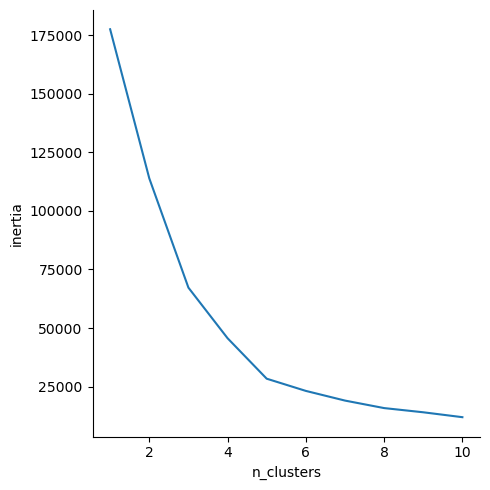

In [40]:
results_df = pd.DataFrame({'n_clusters': list(range(1,11)),
              'inertia': inertia})

sns.relplot(data=results_df, x='n_clusters', y='inertia', kind='line')

plt.show()

- In this specific case, it doesn't seem to have affected the outcome that much, but in general, since KMeans uses distance between points, things should be scaled to eachother

Compare k-means clustering results on scaled and unscaled data (you can choose any dataset for this exercise OR use the data/steps outlined in the bonus below). You can show how the resulting clusters differ either with descriptive statistics or visually.

In [54]:
train, validate, test = wrangle_mall.subset_df(df)

(480, 2) (160, 2) (160, 2)


## unscaled data

In [55]:
inertia = []
seed = 42

for n in range(1, 11):
    
    kmeans = KMeans(n_clusters=n, random_state=seed)
    
    kmeans.fit(train[['x', 'y']])
    
    inertia.append(kmeans.inertia_)
    
inertia

[51731.808184711364,
 20670.138258395393,
 13515.979653421917,
 10074.854609476686,
 8208.3238865455,
 6855.176446580979,
 5691.456143262616,
 4712.937903861604,
 4021.8902898376923,
 3345.5819218745146]

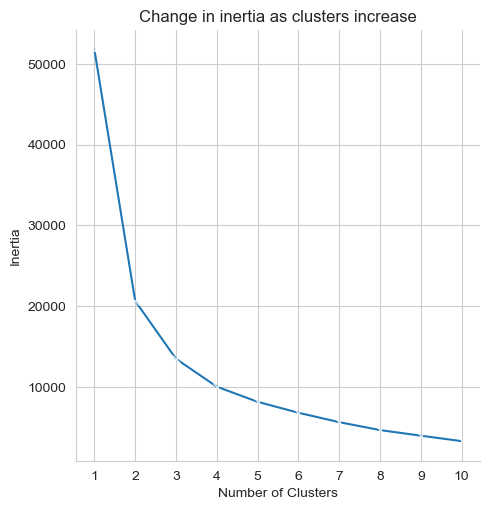

In [68]:
results_df = pd.DataFrame({'n_clusters': list(range(1,11)),
              'inertia': inertia})

sns.set_style("whitegrid")
sns.relplot(data=results_df, x='n_clusters', y='inertia', kind='line', marker='x')

plt.xticks(range(1, 11))
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Change in inertia as clusters increase')
plt.show()

- Using the elbow method, I would use 3 clusters for this data

## scaled data

In [69]:
cols = ['x', 'y']

train_scaled, validate_scaled, test_scaled = wrangle_mall.scale_data(train, validate, test, MinMaxScaler(), cols)

In [72]:
inertia = []
seed = 42

for n in range(1, 11):
    
    kmeans = KMeans(n_clusters=n, random_state=seed)
    
    kmeans.fit(train_scaled[['x', 'y']])
    
    inertia.append(kmeans.inertia_)
    
inertia

[47.58031392249475,
 17.535828275110944,
 12.35327949257835,
 8.101183312758703,
 6.851850379416912,
 5.920640011416714,
 5.324939273837193,
 4.773135682435599,
 4.2446648128722195,
 3.826117496386656]

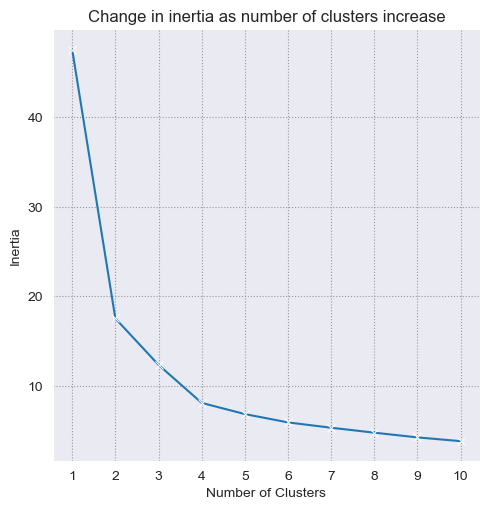

In [75]:
results_df = pd.DataFrame({'n_clusters': list(range(1,11)),
              'inertia': inertia})

sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
sns.relplot(data=results_df, x='n_clusters', y='inertia', kind='line', marker='x')

plt.xticks(range(1, 11))
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Change in inertia as number of clusters increase')
plt.show()

**Bonus** 

- Read in the data from this google sheet: https://docs.google.com/spreadsheets/d/1j5EgXVTR5ikUj3G5ZCQmkq6ziz_gvtASGAdw23-5_6M/edit?usp=sharing
- Visualize the data and guess the number and shape of the clusters.
- Implement the KMeans algorithm on unscaled data and visualize the clusters.
- Repeat the step above but with scaled data.
- Write down the takeaways from this exercise.

In [52]:
df = pd.read_csv('cluster_data.csv')

In [53]:
df

,x,y
0,-3.641747,0.121540
1,-7.620447,1.810897
2,-6.505373,0.068072
3,7.730963,0.585521
4,17.283668,0.344804
...,...,...
795,3.941363,5.807617
796,6.057122,6.010463
797,8.373651,4.641515
798,-2.058756,6.077125


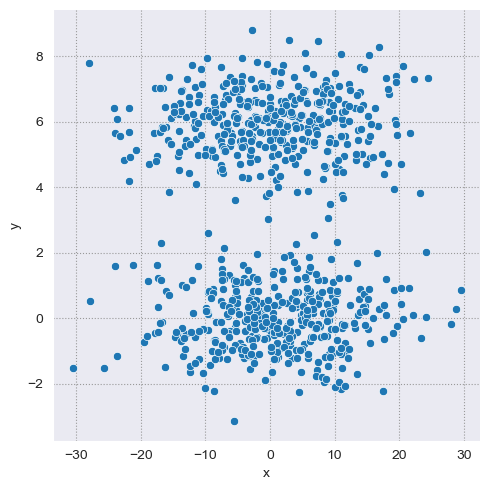

In [78]:
sns.relplot(data=df, x='x', y='y')
plt.show()

See above for scaled and unscaled data visualizations with clustering.

# Clustering 'pipeline'

- Acquire data

- Prepare data

- Split into train, validate, and test subsets

- Visualize what you plan on clustering on

- Scale data

- Create for loop (or a function) to loop through clusters, getting the inertia for each, and, using that to make a line plot and the elbow method to decide upon the best number of clusters

- Visualize your data, using hue or something similar to show the clusters